### CNN Model on Fashion MNIST Dataset

---

**Dataset**
- Total Images: - 70,000
- Train Images: - 60,000 
- Test Images:- 10,000 
- Image Size:- 28 X 28

---

**Different Classes**
- 'T-shirt/top'
- 'Trouser'
- 'Pullover'
- 'Dress'
- 'Coat'
- 'Sandal',
- 'Shirt'
- 'Sneaker'
- 'Bag'
- 'Ankle Boot'
    
---

**Problem Statement**

- Question 1
    - A. Load Fashion data from Keras Library and Split the same into Train and Test.
    - B. Scale the values of train and test between 0 & 1 by dividing train & test by 255

<br>

- Question 2: Display first 25 images from the training dataset and display the labels along with them.

<br>

- Question 3: 
    - Load the data (again, important) 
    - Reshape the data to (28,28,1). 
    - The actual data is in (28,28) format and we need to add a single channel, 1 to it. 
    - Do the reshape for both train and test.

<br>
     
- Question 4:
    - A. Build basic CNN on the fashion MNIST Data.
    - HINT:-
        - Reshape/flatten the data
        - Conv2D with 32 Neuron; Filter 3,3 ; Activation: Relu ; Stride (1,1)
        - MaxPool2D ; Pool Size (2,2)
        - Flatten the data again to send to dense layer
        - 128 Neuron single Dense Layer with relu
        - 10 neuron single dense layer with SoftMax as output layer
    - B. Compile the model with either ADAM or GradientDescent with Loss as sparse_categorical_crossentropy and metrics 'accuracy'
    - HINT:-
        - Optimizer = ‘Adam’
        - Loss = sparse categorical cross entropy
    - C. Fit a model with 30 Epochs and 1000 Batch Size

<br>
    
- Question 5:
    - Now, let's have the same model, but this time using simple "categorical_crossentropy" as loss. 
    - For this, you would have to convert "y" or labels to dummy encoding or categorical encoding. 
    - You can use to_categorical function from Keras.
    - HINT:-
        - Optimizer = ‘Adam’
        - Loss = ‘categorical_crossentropy
        - https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

<br>
        
- Question 6:
    - A. Save the model as .H5 file, as “my_model”.h5. In colab, make sure your files are stored in “files” section (left section of notebook, there’s a tab called files).
    - B. Now load the "my_model.h5" and evaluate the test_image and test_label with new_model to check accuracy. Print the accuracy
    - Hint: https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model

<br>
    
- Question 7: Print the Confusion Matrix for predicted classes of test_images and test_label.

<br>

- Question 8: Print the count of total misclassification that occurred using the saved model.

<br>

- Question 9:
    - Write an experiment that can perform multiple parameters training. 
    - Save the intermediate output of each experiment in the dictionary. 
    - The key for each experiment will be string combination of (optimizer+Epoch+BatchSize).
    - Hint:-
        - Epochs = [10,30,50]
        - Batch Size = [500,1000, 5000]
        - Optimizer = [Adam, RmsProp, SGD]
    - Use the standard CNN architecture using above parameters and check the accuracy and performance of various models.

### To measure execution time for each cell.

In [1]:
!pip install ipython-autotime

%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=39aa534369920f28dcf41d1885d8dd5b649492afed231caa84321c543badd3a2
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


### Loading Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
time: 35.7 s


### Importing Modules

In [3]:
import warnings
warnings.filterwarnings('ignore')

time: 3.73 ms


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
import tensorflow as tf
from tensorflow import keras
from keras.datasets.mnist import load_data
from keras.utils.vis_utils import plot_model
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import Adam, SGD
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


time: 1.81 s


## Question 1

### A - Load Fashion data from Keras Library and Split the same into Train and Test

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step
time: 1.32 s


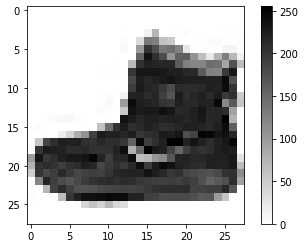

time: 216 ms


In [6]:
# Displaying the first image from training data along with range of pixels in colorbar

'''
From color bar we can see that all the pixel values fall between 0 to 255
Hence for scaling the data, we can divide the train and test data by 255.0
'''

plt.figure()
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

### B - Scale the values of train and test between 0 & 1 by dividing train & test by 255

In [7]:
# Normalizing the RGB codes by dividing it to the max RGB value

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

## Question 2 
- Display first 25 images from the training dataset and display the labels along with them

In [8]:
# Mapping label numbers to actual product name

class_names = ['T-shirt/top', # Index 0
               'Trouser',     # Index 1
               'Pullover',    # Index 2
               'Dress',       # Index 3 
               'Coat',        # Index 4
               'Sandal',      # Index 5
               'Shirt',       # Index 6
               'Sneaker',     # Index 7
               'Bag',         # Index 8
               'Ankle boot']  # Index 9

time: 4.55 ms


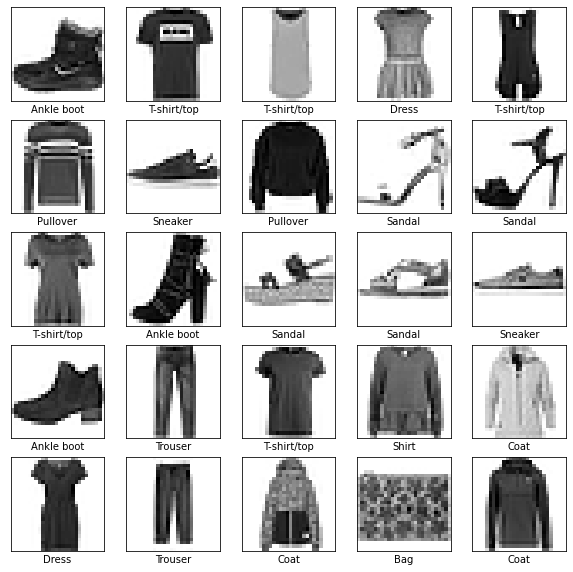

time: 748 ms


In [9]:
'''
The Fashion MNIST data labels does not contain 
the actual product name rather the index numbers
Hence, I have defined a variable, class_names that
maps the index numbers to the actual product names.
'''
# First 25 images with labels

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## Question 3
- Load the data (again, important)
- Reshape the data to (28,28,1). 
- The actual data is in (28,28) format and we need to add a single channel, 1 to it.
- Do the reshape for both train and test.

In [10]:
# Reloading the data
(X_train, y_train), (X_test, y_test) = load_data()

11493376/11490434 [==============================] - 2s 0us/step
time: 3.36 s


In [11]:
print('Training data dimensions before reshaping:', X_train.shape)

Training data dimensions before reshaping: (60000, 28, 28)
time: 1.19 ms


In [12]:
# Reshaping the array to 4-dims so that it can work with the Keras API
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

time: 2 ms


In [13]:
# Making sure that the values are float so that we can get decimal points after division
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')

time: 836 µs


In [14]:
print('Training data dimensions after reshaping:', X_train.shape)
print('\nNumber of images in training data:', X_train.shape[0])
print('\nNumber of images in test data:', X_test.shape[0])

Training data dimensions after reshaping: (60000, 28, 28, 1)

Number of images in training data: 60000

Number of images in test data: 10000
time: 5.31 ms


## Question 4

### A - Build basic CNN on the fashion MNIST Data

In [15]:
# Creating a Sequential Model and adding the layers
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(
    1, 1), input_shape=input_shape, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
time: 8.4 s


### B - Compile the model with either ADAM or GradientDescent with Loss as sparse_categorical_crossentropy and metrics 'accuracy'

In [16]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001,
                             beta_1=0.9,
                             beta_2=0.999,
                             epsilon=1e-7),
              metrics=['accuracy'])

time: 34.8 ms


### C - Fit a model with 30 Epochs and 1000 Batch Size

In [17]:
history = model.fit(x=X_train, 
                    y=y_train, 
                    epochs=30, 
                    batch_size=1000,
                    verbose=2, 
                    validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 8s - loss: 9.0888 - accuracy: 0.7304 - val_loss: 0.5383 - val_accuracy: 0.9013
Epoch 2/30
 - 1s - loss: 0.3797 - accuracy: 0.9162 - val_loss: 0.2820 - val_accuracy: 0.9337
Epoch 3/30
 - 1s - loss: 0.2119 - accuracy: 0.9446 - val_loss: 0.2005 - val_accuracy: 0.9471
Epoch 4/30
 - 1s - loss: 0.1415 - accuracy: 0.9608 - val_loss: 0.1567 - val_accuracy: 0.9562
Epoch 5/30
 - 1s - loss: 0.1043 - accuracy: 0.9701 - val_loss: 0.1404 - val_accuracy: 0.9603
Epoch 6/30
 - 1s - loss: 0.0817 - accuracy: 0.9764 - val_loss: 0.1260 - val_accuracy: 0.9649
Epoch 7/30
 - 1s - loss: 0.0646 - accuracy: 0.9807 - val_loss: 0.1194 - val_accuracy: 0.9667
Epoch 8/30
 - 1s - loss: 0.0536 - accuracy: 0.9840 - val_loss: 0.1149 - val_accuracy: 0.9683
Epoch 9/30
 - 1s - loss: 0.0443 - accuracy: 0.9870 - val_loss: 0.1128 - val_accuracy: 0.9697
Epoch 10/30
 - 1s - loss: 0.0363 - accuracy: 0.9896 - val_loss: 0.1055 - val_accuracy: 0.9712
Epoch 11/30
 - 1s -

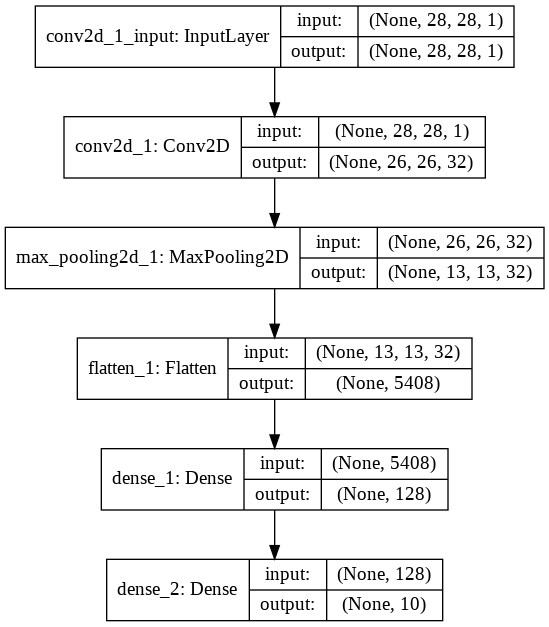

time: 271 ms


In [18]:
plot_model(model, to_file='model_plot.png', show_shapes=True,
           show_layer_names=True, expand_nested=True)

In [19]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Loss: {round(loss*100, 2)}%')
print(f'Accuracy: {round(accuracy*100, 2)}%')

Loss: 11.24%
Accuracy: 97.62%
time: 498 ms


## Question 5 
- Now, let's have the same model, but this time using simple "categorical_crossentropy" as loss. 
- For this, you would have to convert "y" or labels to dummy encoding or categorical encoding. 
- You can use to_categorical function from Keras.

In [20]:
# One hot encoding
y_cat_train = to_categorical(y_train, dtype='float32')
y_cat_test = to_categorical(y_test, dtype='float32')

time: 4.81 ms


In [21]:
# Creating a Sequential Model and adding the layers
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(
    1, 1), input_shape=input_shape, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
time: 38.2 ms


In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001,
                             beta_1=0.9,
                             beta_2=0.999,
                             epsilon=1e-7),
              metrics=['accuracy'])

history = model.fit(x=X_train, 
                    y=y_cat_train, 
                    epochs=30, 
                    batch_size=1000, 
                    verbose=2,
                    validation_data=(X_test, y_cat_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 1s - loss: 4.8709 - accuracy: 0.7659 - val_loss: 0.3765 - val_accuracy: 0.9099
Epoch 2/30
 - 1s - loss: 0.2737 - accuracy: 0.9323 - val_loss: 0.2062 - val_accuracy: 0.9471
Epoch 3/30
 - 1s - loss: 0.1599 - accuracy: 0.9580 - val_loss: 0.1608 - val_accuracy: 0.9601
Epoch 4/30
 - 1s - loss: 0.1077 - accuracy: 0.9700 - val_loss: 0.1374 - val_accuracy: 0.9660
Epoch 5/30
 - 1s - loss: 0.0771 - accuracy: 0.9779 - val_loss: 0.1227 - val_accuracy: 0.9685
Epoch 6/30
 - 1s - loss: 0.0604 - accuracy: 0.9819 - val_loss: 0.1204 - val_accuracy: 0.9672
Epoch 7/30
 - 1s - loss: 0.0466 - accuracy: 0.9864 - val_loss: 0.1077 - val_accuracy: 0.9731
Epoch 8/30
 - 1s - loss: 0.0364 - accuracy: 0.9894 - val_loss: 0.1087 - val_accuracy: 0.9731
Epoch 9/30
 - 1s - loss: 0.0299 - accuracy: 0.9912 - val_loss: 0.1128 - val_accuracy: 0.9751
Epoch 10/30
 - 1s - loss: 0.0246 - accuracy: 0.9926 - val_loss: 0.1028 - val_accuracy: 0.9767
Epoch 11/30
 - 1s -

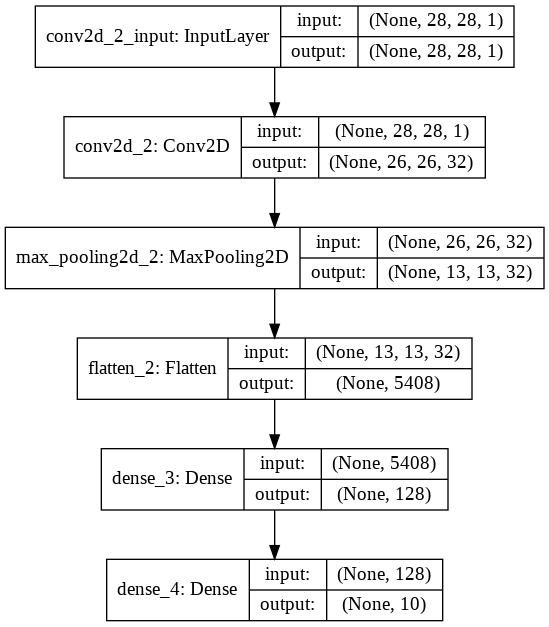

time: 124 ms


In [23]:
plot_model(model, to_file='model_plot.png', show_shapes=True,
           show_layer_names=True, expand_nested=True)

In [24]:
loss, accuracy = model.evaluate(X_test, y_cat_test, verbose=False)
print(f'Loss: {round(loss*100, 2)}%')
print(f'Accuracy: {round(accuracy*100, 2)}%')

Loss: 11.39%
Accuracy: 97.98%
time: 558 ms


## Question 6

### A 
- Save the model as .H5 file, as “my_model”.h5. 
- In colab, make sure your files are stored in “files” section (left section of notebook, there’s a tab called files) 

In [25]:
# Saving the model to Google Drive

model_json = model.to_json()

# Saving the model as JSON file
with open('/content/drive/My Drive/Colab Notebooks/Saved Models/my_model.json', 'w') as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5
model.save_weights(
    '/content/drive/My Drive/Colab Notebooks/Saved Models/my_model.h5')

print('Saved model to disk')

Saved model to disk
time: 3.42 s


### B 
- Now load the "my_model.h5" 
- evaluate the test_image and test_label with new_model to check accuracy. 
- Print the accuracy.

In [26]:
# Loading the model from the Google Drive

json_file = open(
    '/content/drive/My Drive/Colab Notebooks/Saved Models/my_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Load weights into new model
loaded_model.load_weights(
    '/content/drive/My Drive/Colab Notebooks/Saved Models/my_model.h5')

print('Loaded model from disk')

Loaded model from disk
time: 45.9 ms


In [27]:
y_pred = model.predict_classes(X_test)
acc_score = accuracy_score(y_test, y_pred)

# Loaded/Restored model accuracy
print(f'\nRestored Model Accuracy: {acc_score*100}%')


Restored Model Accuracy: 97.98%
time: 370 ms


## Question 7 
- Print the Confusion Matrix for predicted classes of test_images and test_label.

In [28]:
print('\n\t\tThe Classification Report')
print('\t\t-------------------------\n')
# print(classification_report(y_test, LR_pred_od))
report = classification_report(y_test, y_pred, output_dict=True)

df = pd.DataFrame(report).transpose()
for i in df.columns:
    df[i] = round(df[i], 2)

df = df.rename(index={'0': 'T-shirt/top',
                      '1': 'Trousers',
                      '2': 'Pullover',
                      '3': 'Dress',
                      '4': 'Coat',
                      '5': 'Sandal',
                      '6': 'Shirt',
                      '7': 'Sneaker',
                      '8': 'Bag',
                      '9': 'Ankle Boot'})
df


		The Classification Report
		-------------------------



,precision,recall,f1-score,support
T-shirt/top,0.98,0.99,0.98,980.00
Trousers,0.99,0.99,0.99,1135.00
Pullover,0.97,0.98,0.98,1032.00
Dress,0.97,0.98,0.98,1010.00
Coat,0.98,0.99,0.98,982.00
Sandal,0.98,0.98,0.98,892.00
Shirt,0.99,0.97,0.98,958.00
Sneaker,0.98,0.98,0.98,1028.00
Bag,0.98,0.97,0.97,974.00
Ankle Boot,0.97,0.97,0.97,1009.00


time: 60.9 ms


In [29]:
# Printing Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 969    1    1    1    1    1    2    1    3    0]
 [   0 1122    5    0    1    1    3    2    1    0]
 [   1    0 1012    5    5    1    1    5    1    1]
 [   1    0    3  994    0    5    0    1    5    1]
 [   0    0    0    0  970    0    1    1    1    9]
 [   2    0    0   10    0  871    2    0    5    2]
 [  10    3    1    0    2    5  934    0    3    0]
 [   0    2   13    3    0    0    0 1003    1    6]
 [   5    1    2    8    4    0    1    2  944    7]
 [   0    3    1    5   11    2    0    6    2  979]]
time: 39.6 ms


## Question 8 
- Print the count of total misclassification that occurred using the saved model.

In [30]:
'''
This function has been created to find out the 
number of Misclassification in a given Matrix 
by summing up the number of incorrectly 
classified values from the Confusion Matrix.

The Confusion Matrix has been printed above and
we are using that for our calculation.
'''

def misclass(cfm):

    misclass = []
    ctr = 0
    while ctr < 10:
        summ = [sum(row) for row in cfm]
        diff = cfm[ctr][ctr]
        for x in summ:
            mis = x - diff
        misclass.append(mis)
        ctr += 1

    return sum(misclass)

print(f'Count for Total Misclassifications are {misclass(cm)}')

Count for Total Misclassifications are 292
time: 9.98 ms


## Question 9 
- Write an experiment that can perform multiple parameters training. 
- Save the intermediate output of each experiment in the dictionary. 
- The key for each experiment will be string combination of (optimizer+Epoch+BatchSize).

>- Epochs = [10,30,50]
>- Batch Size = [500,1000, 5000]
>- Optimizer = [Adam, RmsProp, SGD]

In [31]:
# Creating CNN model for KerasClassifier
def create_model(optimizer='adam'):
    model = Sequential()
    
    model.add(Conv2D(filters=32, 
                     kernel_size=(3, 3), 
                     strides=(1, 1), 
                     input_shape=input_shape, 
                     activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

time: 9.37 ms


In [32]:
# Hyper-paramters
epochs = [10, 30, 50]
batch_size = [500, 1000, 5000]
opt = ['Adam', 'RmsProp', 'SGD']

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model,
                        epochs=10, 
                        batch_size=100, 
                        verbose=2)

parameters = {'batch_size': [500, 1000, 5000], 
              'epochs': [10, 30, 50], 
              'optimizer': ['adam', 'rmsprop', 'sgd']
             }

grid_search = GridSearchCV(estimator=model, 
                           param_grid=parameters, 
                           scoring='accuracy', 
                           cv=2)

grid_search.fit(X_train, y_train)

Epoch 1/10
 - 1s - loss: 5.0603 - accuracy: 0.7904
Epoch 2/10
 - 0s - loss: 0.3021 - accuracy: 0.9275
Epoch 3/10
 - 0s - loss: 0.1643 - accuracy: 0.9555
Epoch 4/10
 - 0s - loss: 0.1030 - accuracy: 0.9699
Epoch 5/10
 - 0s - loss: 0.0669 - accuracy: 0.9798
Epoch 6/10
 - 0s - loss: 0.0464 - accuracy: 0.9850
Epoch 7/10
 - 0s - loss: 0.0340 - accuracy: 0.9894
Epoch 8/10
 - 0s - loss: 0.0229 - accuracy: 0.9930
Epoch 9/10
 - 0s - loss: 0.0161 - accuracy: 0.9957
Epoch 10/10
 - 0s - loss: 0.0116 - accuracy: 0.9973
Epoch 1/10
 - 1s - loss: 7.6433 - accuracy: 0.7834
Epoch 2/10
 - 0s - loss: 0.4917 - accuracy: 0.9455
Epoch 3/10
 - 0s - loss: 0.2012 - accuracy: 0.9676
Epoch 4/10
 - 0s - loss: 0.1032 - accuracy: 0.9782
Epoch 5/10
 - 0s - loss: 0.0611 - accuracy: 0.9858
Epoch 6/10
 - 0s - loss: 0.0354 - accuracy: 0.9904
Epoch 7/10
 - 0s - loss: 0.0213 - accuracy: 0.9942
Epoch 8/10
 - 0s - loss: 0.0163 - accuracy: 0.9949
Epoch 9/10
 - 0s - loss: 0.0106 - accuracy: 0.9969
Epoch 10/10
 - 0s - loss: 0.00

GridSearchCV(cv=2, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f114e06a400>,
             iid='deprecated', n_jobs=None,
             param_grid={'batch_size': [500, 1000, 5000],
                         'epochs': [10, 30, 50],
                         'optimizer': ['adam', 'rmsprop', 'sgd']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

time: 11min 4s


In [40]:
print(f'Best Accuracy of {round((grid_search.best_score_)*100, 2)}% \nis achieved using \n{grid_search.best_params_}')

Best Accuracy of 98.36% 
is achieved using 
{'batch_size': 1000, 'epochs': 50, 'optimizer': 'rmsprop'}
time: 2.13 ms


In [34]:
means = np.round(grid_search.cv_results_['mean_test_score'], 4)

params = grid_search.cv_results_['params']

for i, j in zip(params, means):
    print(f'{i} {j}')

{'batch_size': 500, 'epochs': 10, 'optimizer': 'adam'} 0.9702
{'batch_size': 500, 'epochs': 10, 'optimizer': 'rmsprop'} 0.9768
{'batch_size': 500, 'epochs': 10, 'optimizer': 'sgd'} 0.4511
{'batch_size': 500, 'epochs': 30, 'optimizer': 'adam'} 0.9736
{'batch_size': 500, 'epochs': 30, 'optimizer': 'rmsprop'} 0.9812
{'batch_size': 500, 'epochs': 30, 'optimizer': 'sgd'} 0.9112
{'batch_size': 500, 'epochs': 50, 'optimizer': 'adam'} 0.975
{'batch_size': 500, 'epochs': 50, 'optimizer': 'rmsprop'} 0.9807
{'batch_size': 500, 'epochs': 50, 'optimizer': 'sgd'} 0.528
{'batch_size': 1000, 'epochs': 10, 'optimizer': 'adam'} 0.9662
{'batch_size': 1000, 'epochs': 10, 'optimizer': 'rmsprop'} 0.9636
{'batch_size': 1000, 'epochs': 10, 'optimizer': 'sgd'} 0.5317
{'batch_size': 1000, 'epochs': 30, 'optimizer': 'adam'} 0.9712
{'batch_size': 1000, 'epochs': 30, 'optimizer': 'rmsprop'} 0.9817
{'batch_size': 1000, 'epochs': 30, 'optimizer': 'sgd'} 0.9244
{'batch_size': 1000, 'epochs': 50, 'optimizer': 'adam'} 